Лабораторна робота 1.2 студента С. О. Семерікова

Варіант 10: Medical Cost Personal Dataset

Опис: Прогнозування персональних медичних витрат на основі демографічних та медичних даних.

Джерело даних: Kaggle Medical Cost Personal Dataset

Отримання та використання даних:

    1. Завантажте файл даних з Kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance)
    2. Дані представлені у форматі CSV
    3. Використовуйте pandas для завантаження даних:


    1. Вибір варіанту завдання
            ▪ Оберіть один з 10 варіантів завдань відповідно до свого номеру в групі або за вказівкою викладача.
        ◦ Ознайомтеся з описом набору даних та способом його отримання.

In [16]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

# Після завантаження файлу
df = pd.read_csv(path + '/' + 'insurance.csv')
# Перетворіть категоріальні змінні за допомогою one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
# Виберіть features (X) та цільову змінну (y)
X = df.drop('charges', axis=1).values
y = df['charges'].values

100%|██████████| 16.0k/16.0k [00:00<00:00, 15.0MB/s]

Extracting files...


In [50]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [17]:
X[0]

array([19, 27.9, 0, False, True, False, False, True], dtype=object)

In [18]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

    2. Завантаження та підготовка даних
        ◦ Завантажте набір даних згідно з інструкціями для вашого варіанту
        ◦ Здійсніть попередній аналіз даних (розмір вибірки, кількість ознак, типи даних)
        ◦ Обробіть пропущені значення та проведіть нормалізацію даних

In [19]:
rows = X.shape[0]
cols = X.shape[1]

for i in range(rows):
  for j in range(3, cols):
    if X[i][j] == True:
      X[i][j] = 1
    else:
      X[i][j] = 0

In [20]:
X

array([[19, 27.9, 0, ..., 0, 0, 1],
       [18, 33.77, 1, ..., 0, 1, 0],
       [28, 33.0, 3, ..., 0, 1, 0],
       ...,
       [18, 36.85, 0, ..., 0, 1, 0],
       [21, 25.8, 0, ..., 0, 0, 1],
       [61, 29.07, 0, ..., 1, 0, 0]], dtype=object)

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

    3. Розділення даних на тренувальну та тестову вибірки
        ◦ Використовуйте метод train_test_split для розділення даних
        ◦ Рекомендоване співвідношення: 80% для тренування, 20% для тестування

In [30]:
# Розділяємо дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормалізація даних
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

    4. Реалізація функцій лінійної регресії
        ◦ Реалізуйте функцію обчислення вихідних значень моделі compute_model_output
        ◦ Реалізуйте функцію обчислення вартості compute_cost
        ◦ Реалізуйте функцію обчислення градієнту compute_gradient
        ◦ Реалізуйте функцію градієнтного спуску gradient_descent

In [32]:
# 1. Функція обчислення моделі
def compute_model_output(X, w, b):
    """
    Обчислює прогноз лінійної моделі

    Аргументи:
      X (ndarray (m,n)): Дані, m прикладів з n ознаками
      w (ndarray (n,)): параметри моделі
      b (скаляр): параметр моделі

    Повертає:
      f_wb (ndarray (m,)): прогнозовані значення
    """
    m = X.shape[0]
    f_wb = np.zeros(m)

    for i in range(m):
        f_wb[i] = np.dot(X[i], w) + b

    return f_wb

# 2. Функція обчислення вартості
def compute_cost(X, y, w, b):
    """
    Обчислює функцію вартості для лінійної регресії

    Аргументи:
      X (ndarray (m,n)): Дані, m прикладів з n ознаками
      y (ndarray (m,)): цільові значення
      w (ndarray (n,)): параметри моделі
      b (скаляр): параметр моделі

    Повертає:
      total_cost (float): вартість використання w,b як параметрів для лінійної регресії
    """
    m = X.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

# 3. Функція обчислення градієнта
def compute_gradient(X, y, w, b):
    """
    Обчислює градієнт для лінійної регресії

    Аргументи:
      X (ndarray (m,n)): Дані, m прикладів з n ознаками
      y (ndarray (m,)): цільові значення
      w (ndarray (n,)): параметри моделі
      b (скаляр): параметр моделі

    Повертає:
      dj_dw (ndarray (n,)): Градієнт функції вартості відносно параметрів w
      dj_db (скаляр): Градієнт функції вартості відносно параметра b
    """
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

# 4. Функція градієнтного спуску
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Виконує градієнтний спуск для пошуку w,b

    Аргументи:
      X (ndarray (m,n)): Дані, m прикладів з n ознаками
      y (ndarray (m,)): цільові значення
      w_in (ndarray (n,)): початкові значення параметрів моделі
      b_in (скаляр): початкове значення параметра моделі
      alpha (float): швидкість навчання
      num_iters (int): кількість ітерацій градієнтного спуску

    Повертає:
      w (ndarray (n,)): Оновлені значення параметрів w після градієнтного спуску
      b (скаляр): Оновлене значення параметра b після градієнтного спуску
      J_history (List): Історія значень функції вартості
      p_history (list): Історія параметрів [w,b]
    """

    # Масив для збереження значень вартості J та параметрів w, b
    J_history = []
    p_history = []
    w = w_in.copy()  # уникаємо зміни глобальних значень параметрів
    b = b_in

    for i in range(num_iters):
        # Обчислення градієнту
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        # Оновлення параметрів
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Збереження історії
        J_history.append(compute_cost(X, y, w, b))
        p_history.append([w.copy(), b])

        # Вивід проміжних результатів
        if i % (num_iters // 10) == 0 or i == num_iters - 1:
            print(f"Ітерація {i:4}: Вартість {J_history[-1]:0.2e}, ",
                  f"w[0]: {w[0]: 0.3e}, b: {b: 0.5e}")

    return w, b, J_history, p_history


    5. Навчання моделі
        ◦ Ініціалізуйте початкові значення параметрів
        ◦ Виконайте алгоритм градієнтного спуску для знаходження оптимальних параметрів
        ◦ Відстежуйте зміну функції вартості під час навчання

In [37]:
# Параметри для градієнтного спуску
w_init = np.zeros(X_train.shape[1])  # параметр w для кожної ознаки
b_init = 0  # початкове значення b
alpha = 0.01  # швидкість навчання
iterations = 1000  # кількість ітерацій

# Розмір навчальної вибірки
m = X_train.shape[0]
n = X_train.shape[1]  # кількість ознак

print(f"Розмір тренувальних даних: {X_train.shape}")
print(f"Кількість прикладів (m): {m}")
print(f"Кількість ознак (n): {n}")


Розмір тренувальних даних: (1070, 8)
Кількість прикладів (m): 1070
Кількість ознак (n): 8


In [38]:
# 5. Запуск градієнтного спуску на нормалізованих даних
w_final, b_final, J_hist, p_hist = gradient_descent(X_train_norm, y_train, w_init, b_init, alpha, iterations)
print(f"Знайдені параметри (w,b): w={w_final}, b={b_final:8.4f}")

Ітерація    0: Вартість 1.58e+08,  w[0]:  3.385e+01, b:  1.33461e+02
Ітерація  100: Вартість 3.76e+07,  w[0]:  2.212e+03, b:  8.50984e+03
Ітерація  200: Вартість 2.13e+07,  w[0]:  3.063e+03, b:  1.15759e+04
Ітерація  300: Вартість 1.90e+07,  w[0]:  3.398e+03, b:  1.26981e+04
Ітерація  400: Вартість 1.87e+07,  w[0]:  3.530e+03, b:  1.31089e+04
Ітерація  500: Вартість 1.86e+07,  w[0]:  3.582e+03, b:  1.32593e+04
Ітерація  600: Вартість 1.86e+07,  w[0]:  3.602e+03, b:  1.33143e+04
Ітерація  700: Вартість 1.86e+07,  w[0]:  3.610e+03, b:  1.33345e+04
Ітерація  800: Вартість 1.86e+07,  w[0]:  3.613e+03, b:  1.33418e+04
Ітерація  900: Вартість 1.86e+07,  w[0]:  3.614e+03, b:  1.33445e+04
Ітерація  999: Вартість 1.86e+07,  w[0]:  3.615e+03, b:  1.33455e+04
Знайдені параметри (w,b): w=[ 3.61488185e+03  2.03241312e+03  5.16980755e+02 -8.70529765e+00
  9.55789194e+03 -1.43936208e+02 -2.74066666e+02 -3.34265195e+02], b=13345.5136


    6. Оцінка якості моделі
        ◦ Обчисліть метрики якості моделі (R², MSE, MAE) на тренувальній вибірці
        ◦ Проведіть оцінку моделі на тестовій вибірці
        ◦ Проаналізуйте важливість ознак (feature importance)

In [42]:
# 7. Використання моделі для прогнозування
def predict(X, w, b):
    """
    Прогнозування за допомогою лінійної моделі

    Аргументи:
      X (ndarray (m,n)): Дані, m прикладів з n ознаками
      w (ndarray (n,)): параметри моделі
      b (скаляр): параметр моделі

    Повертає:
      y_pred (ndarray (m,)): прогнозовані значення
    """
    return np.dot(X, w) + b



In [43]:
# Обчислення прогнозів для тренувальних даних
y_pred_train = predict(X_train_norm, w_final, b_final)


In [44]:
# Додатковий аналіз - коефіцієнт детермінації R²
def r_squared(y_true, y_pred):
    """
    Обчислює коефіцієнт детермінації R²

    Аргументи:
      y_true (ndarray): фактичні значення
      y_pred (ndarray): прогнозовані значення

    Повертає:
      r2 (скаляр): коефіцієнт детермінації
    """
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2


In [45]:
# Обчислення R²
r2 = r_squared(y_train, y_pred_train)
print(f"\nКоефіцієнт детермінації (R²): {r2:.4f}")



Коефіцієнт детермінації (R²): 0.7417


In [46]:
# Додатковий аналіз - середньоквадратична помилка
mse = np.mean((y_train - y_pred_train)**2)
print(f"Середньоквадратична помилка (MSE): {mse:.4f}")

# Додатковий аналіз - середня абсолютна помилка
mae = np.mean(np.abs(y_train - y_pred_train))
print(f"Середня абсолютна помилка (MAE): {mae:.4f}")



Середньоквадратична помилка (MSE): 37277905.9195
Середня абсолютна помилка (MAE): 4207.7957


    7. Аналіз та візуалізація результатів
        ◦ Візуалізуйте дані та отриману модель
        ◦ Проаналізуйте процес навчання (зміну функції вартості)
        ◦ Створіть графік прогнозів моделі порівняно зі справжніми значеннями

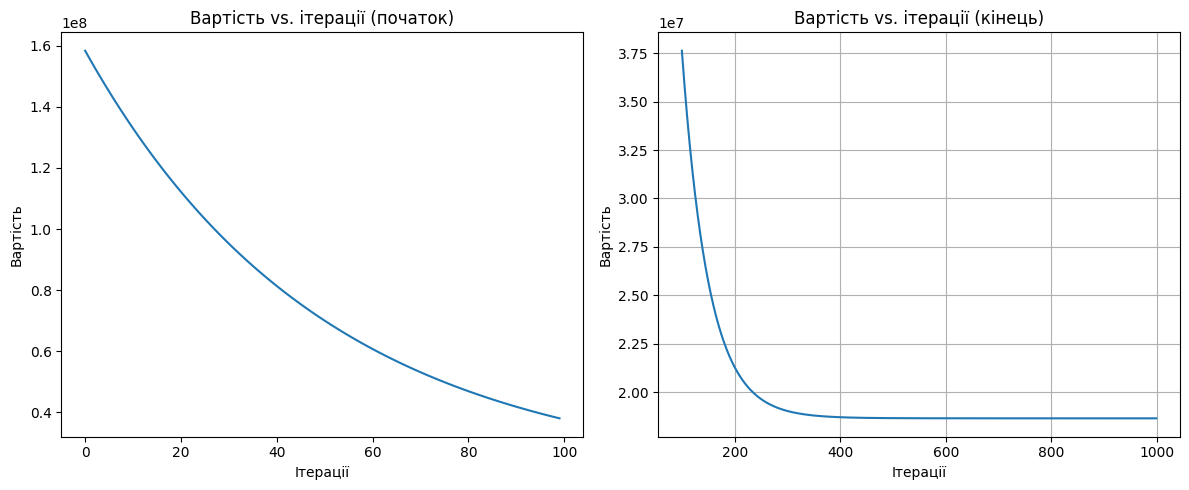

In [41]:
import matplotlib.pyplot as plt

# 6. Візуалізація результатів
# 6.1 Візуалізація зміни функції вартості
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(J_hist[:100])
plt.title('Вартість vs. ітерації (початок)')
plt.xlabel('Ітерації')
plt.ylabel('Вартість')

plt.subplot(1, 2, 2)
plt.plot(range(100, len(J_hist)), J_hist[100:])
plt.title('Вартість vs. ітерації (кінець)')
plt.xlabel('Ітерації')
plt.ylabel('Вартість')
plt.grid(True)
plt.tight_layout()
plt.show()

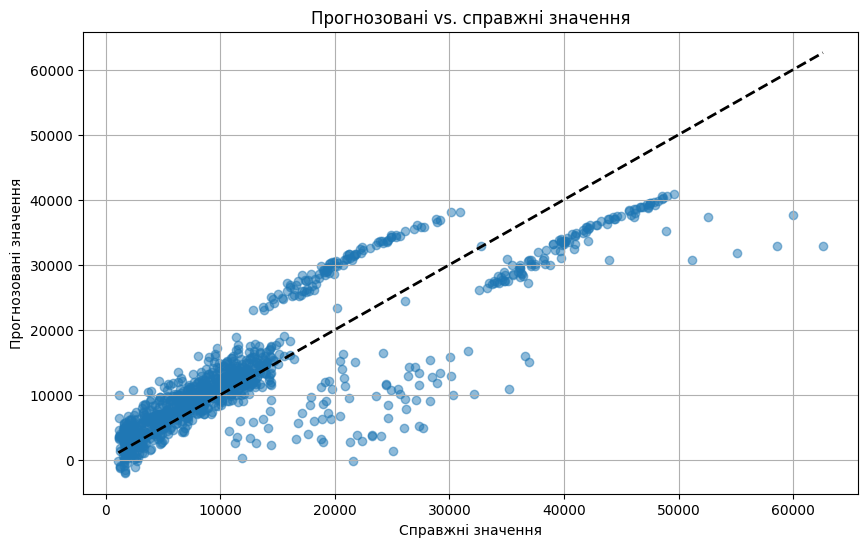

In [47]:
# 8. Візуалізація прогнозів vs. справжніх значень
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Прогнозовані vs. справжні значення')
plt.grid(True)
plt.show()

In [49]:
w_final

array([ 3.61488185e+03,  2.03241312e+03,  5.16980755e+02, -8.70529765e+00,
        9.55789194e+03, -1.43936208e+02, -2.74066666e+02, -3.34265195e+02])

In [51]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


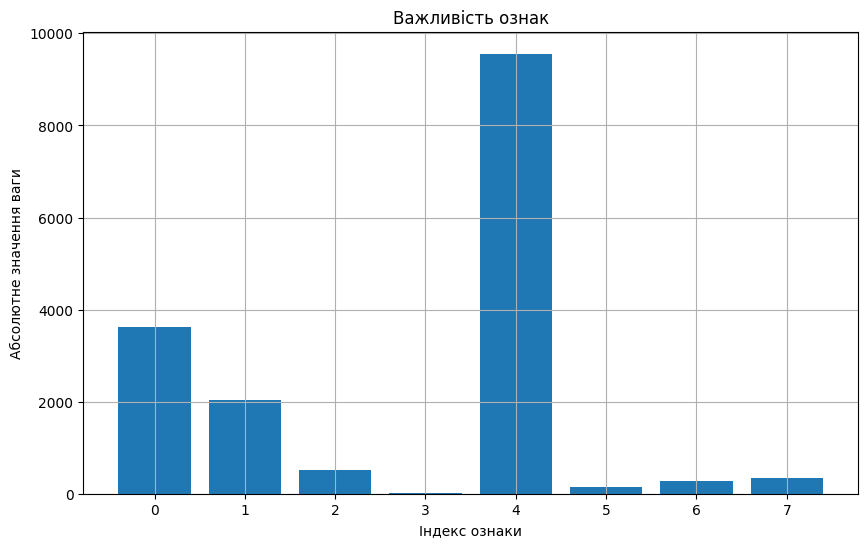

In [48]:
# 9. Візуалізація важливості ознак
if n <= 10:  # Відображаємо тільки якщо кількість ознак не надто велика
    feature_importance = abs(w_final)
    plt.figure(figsize=(10, 6))
    plt.bar(range(n), feature_importance)
    plt.xlabel('Індекс ознаки')
    plt.ylabel('Абсолютне значення ваги')
    plt.title('Важливість ознак')
    plt.grid(True)
    plt.show()

    8. Експериментування з гіперпараметрами
        ◦ Змініть значення швидкості навчання (alpha) та кількості ітерацій
        ◦ Дослідіть вплив різних підходів до нормалізації даних
        ◦ Порівняйте результати з різними наборами ознак